# Geologic information

**Description:** Download fault locations, geologic unit boundaries, and source information for Antarctic from the GeoMAP compilation. 

**Dataset:** 

Cox, Simon Christopher, Belinda Smith Lyttle, Samuel Elkind, Christine S. Smith Siddoway, Paul Morin, Giovanni Capponi, Tamer Abu-Alam, et al. “The GeoMAP (v.2022-08) Continent-Wide Detailed Geological Dataset of Antarctica.” PANGAEA, 2023. https://doi.org/10.1594/PANGAEA.951482.


**Associated paper:**

Cox, Simon C., Belinda Smith Lyttle, Samuel Elkind, Christine Smith Siddoway, Paul Morin, Giovanni Capponi, Tamer Abu-Alam, et al. “A Continent-Wide Detailed Geological Map Dataset of Antarctica.” Scientific Data 10, no. 1 (May 18, 2023): 250. https://doi.org/10.1038/s41597-023-02152-9.


In [1]:
import polartoolkit as ptk

In [2]:
version_names = [
    "faults",
    "units",
    # "sources", # not interesting to plot
    # "quality", # not interesting to plot
]


data = []
for name in version_names:
    d = ptk.fetch.geomap(
        version=name,
        # available options
        # region,
        region=ptk.regions.antarctica,
    )
    # only keep subset of largest units to speed up the plotting below
    if name == "units":
        d = d.sort_values(by="Shape_Area", ascending=False).copy()
        d = d.iloc[0 : int(len(d) / 4)]  # largest 1/4 of shapes
    data.append(d)

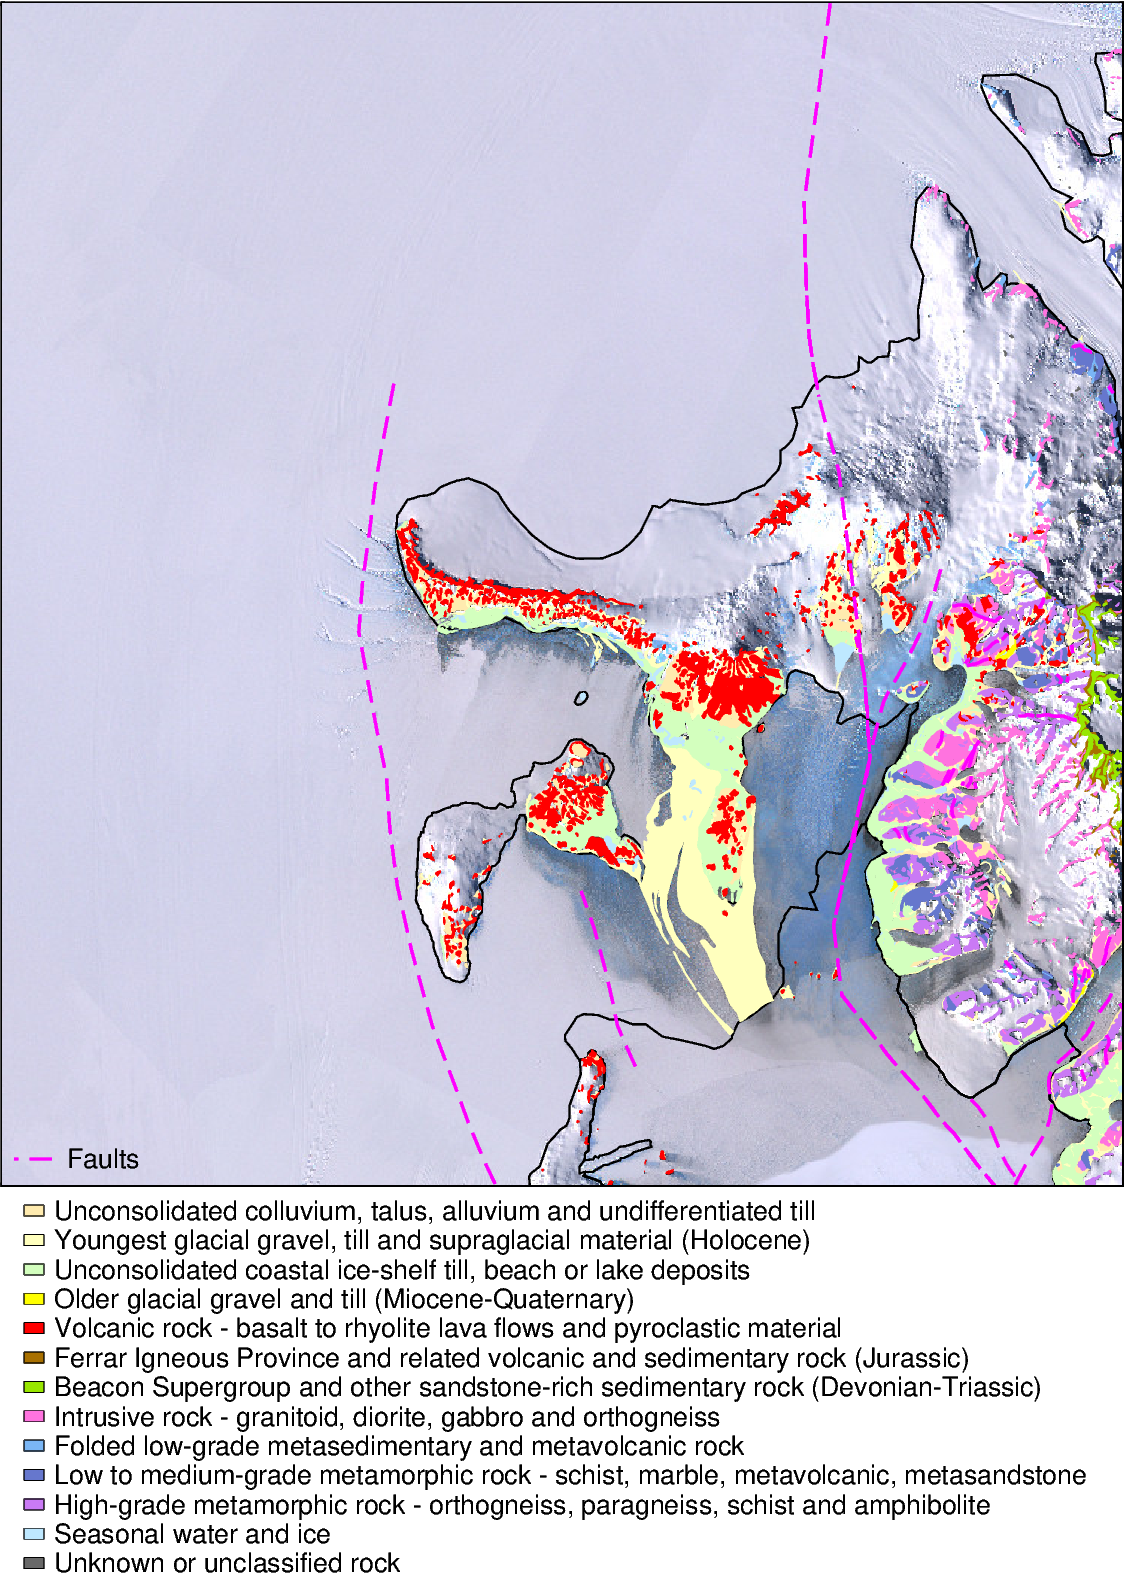

In [3]:
fig = ptk.basemap(
    region=ptk.regions.minna_bluff,
    hemisphere="south",
    coast=True,
    imagery_basemap=True,
)
fig.add_geologic_units()
fig.add_faults(legend_loc="jBL")
fig.show(dpi=200)

## Plotting faults

You can also use the function `add_faults` for an easy way to specify and plot faults.

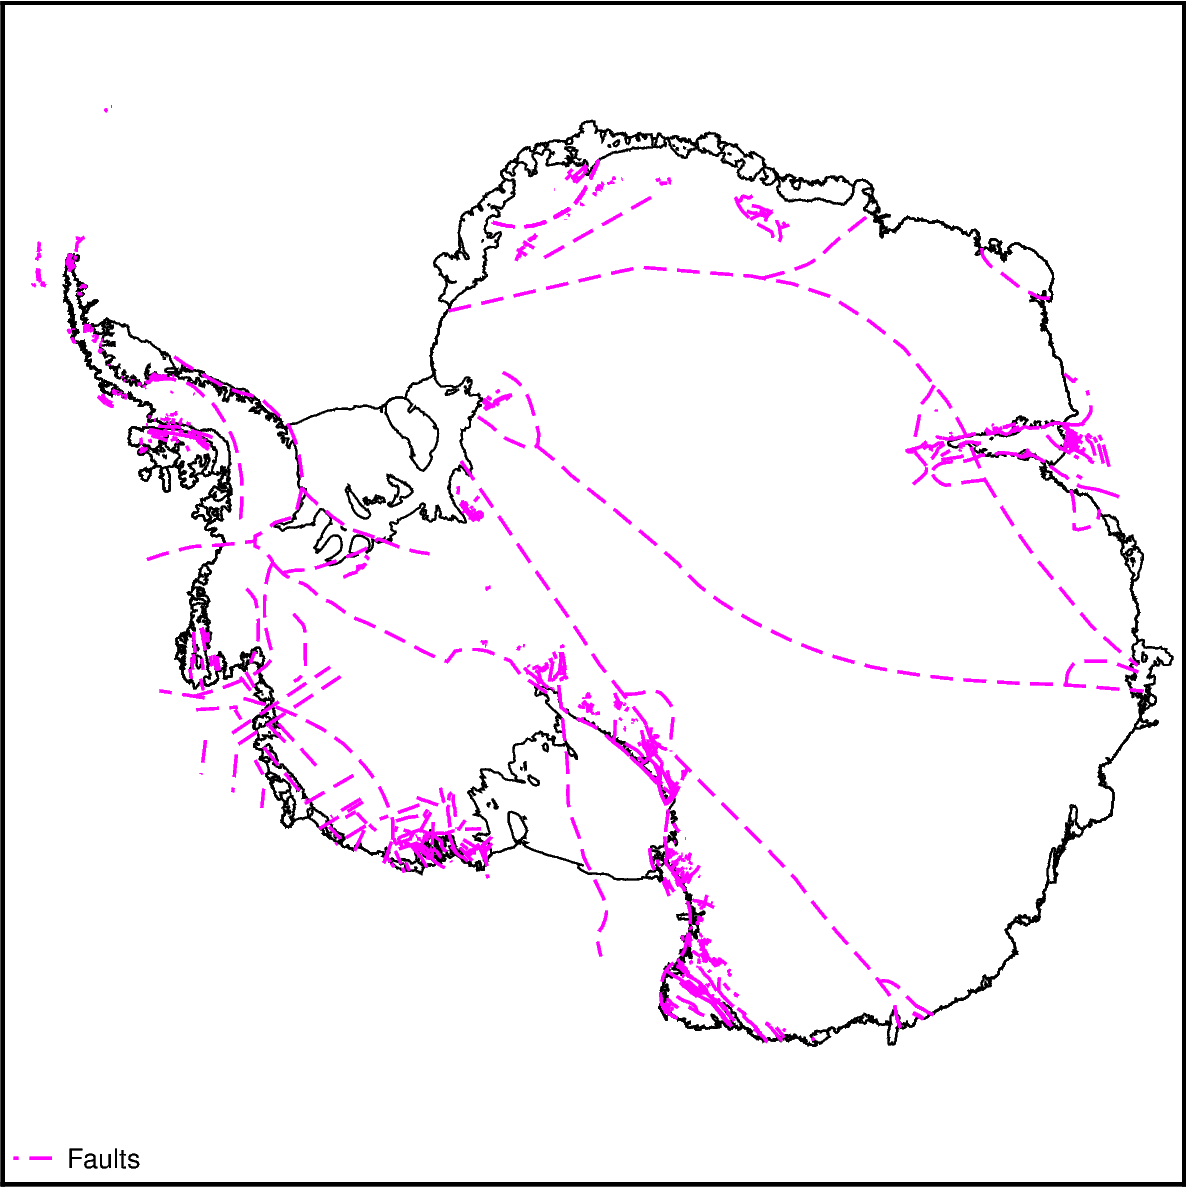

In [4]:
fig = ptk.basemap(
    region=ptk.regions.antarctica,
    hemisphere="south",
    coast=True,
)

# with defaults
fig.add_faults(legend_loc="jBL")

fig.show(dpi=200)

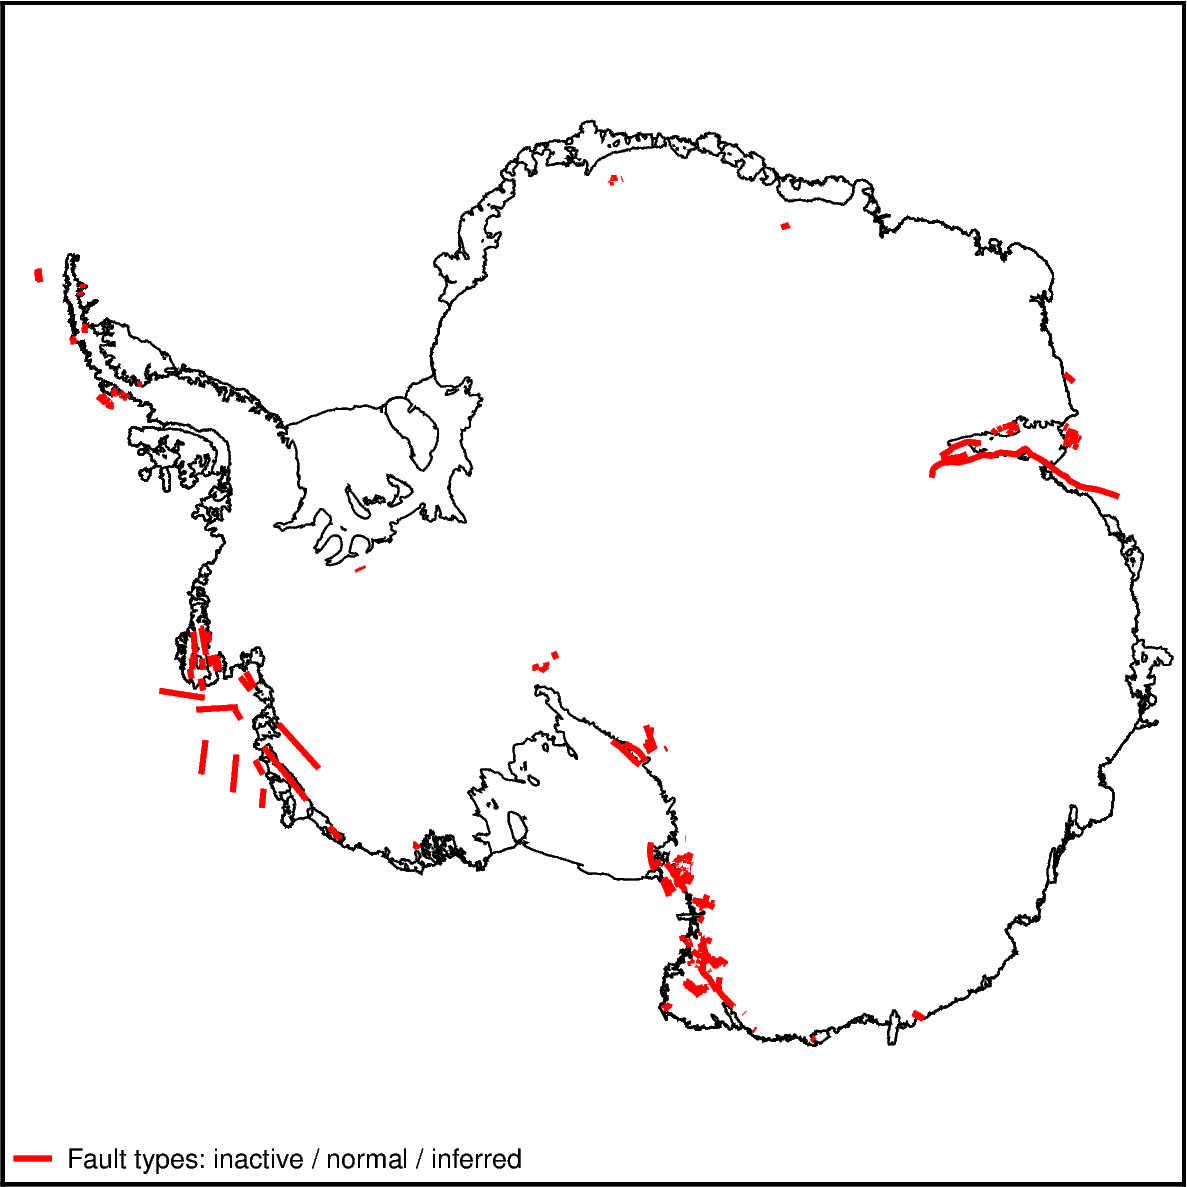

In [5]:
fig = ptk.basemap(
    region=ptk.regions.antarctica,
    hemisphere="south",
    coast=True,
)

# specifying fault types
fig.add_faults(
    faults_activity="inactive",
    faults_motion="normal",
    faults_exposure="inferred",
    pen="2p,red",
    legend_loc="jBL",
)

fig.show(dpi=200)